In [1]:
!pip install pyspike


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pickle
import numpy as np
import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/qi.p', 'rb') as f:

  mdf1 = pickle.load(f)
print(mdf1)


ass = mdf1.analogsignals[0]   
vm_spiking = []
vm_not_spiking = []

spike_trains = []

for spiketrain in mdf1.spiketrains:
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,len(ass)))        
    spike_trains.append(pspikes)
    #print(np.max((ass[spiketrain.annotations['source_id']])))
    if np.max(ass[spiketrain.annotations['source_id']]) > 0.0:
        print('yes')
        vm_spiking.append(ass[spiketrain.annotations['source_id']])
    else:
        vm_not_spiking.append(ass[spiketrain.annotations['source_id']])



In [3]:
print(dir(mdf1))
end_floor = np.floor(float(mdf1.t_stop))
dt = float(mdf1.t_stop) % end_floor

print(mdf1.t_stop)
mdf1.t_start
import quantities as pq

v = mdf1.take_slice_of_analogsignalarray_by_unit()
print(mdf1.t_start, mdf1.t_stop, dt)

t_axis = np.arange(float(mdf1.t_start), float(mdf1.t_stop), dt)
mdf1.events
print(mdf1.block)
#im

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_all_attrs', '_child_containers', '_child_objects', '_child_properties', '_container_child_containers', '_container_child_objects', '_data_child_containers', '_data_child_objects', '_has_repr_pretty_attrs_', '_multi_child_containers', '_multi_child_objects', '_multi_children', '_multi_parent_containers', '_multi_parent_objects', '_necessary_attrs', '_parent_containers', '_parent_objects', '_recommended_attrs', '_repr_pretty_', '_repr_pretty_attrs_', '_repr_pretty_attrs_keys_', '_repr_pretty_containers', '_single_child_containers', '_single_child_objects', '_single_children', '_single_parent_containers', '_single_parent_objects', 'analogsignals', 'annotate', 'annotati

In [4]:

smaller_list = []    
for a in ass:
    #for i in ass:
    if np.min(a) <-100.0 or np.max(a) > 100.0:
        break
    else:  
        smaller_list.append(a)

assert len(smaller_list) < len(ass)        

[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   1.99999900e+04
   2.00000000e+04   2.00000100e+04]


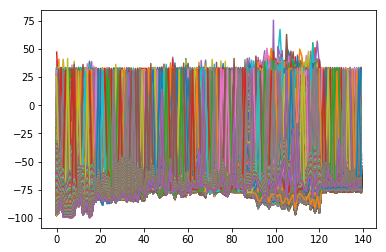

In [5]:
from pyNN.utility.plotting import Figure, Panel

print(t_axis)
plt.figure()
plt.clf()
for s in smaller_list:
    plt.plot([i for i in range(0,len(s))],s)
plt.show()


The $V_{M}$ of a neuron listening to excitatory and inhibitory inputs but not fully depolarizing


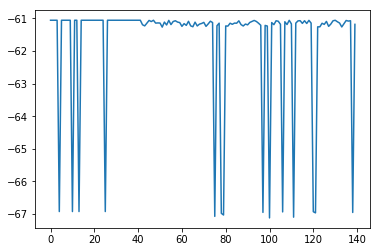

In [6]:


plt.figure()
plt.clf()
plt.plot([i for i in range(0,len(vm_not_spiking[110]))],vm_not_spiking[110])
plt.show()

The $V_{M}$ of a neuron listening to only inhibitory inputs but not fully depolarizing


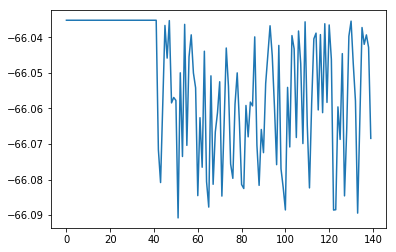

In [7]:

plt.figure()
plt.clf()
plt.plot([i for i in range(0,len(vm_not_spiking[8]))],vm_not_spiking[55])
plt.show()

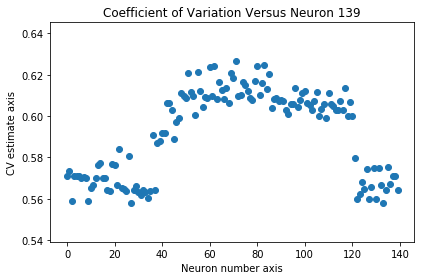

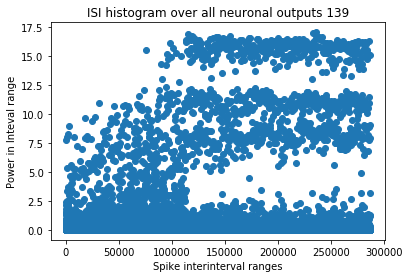

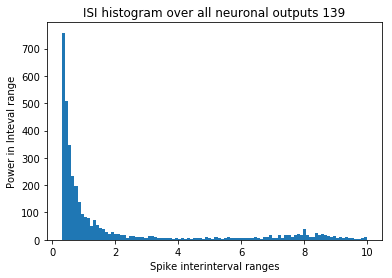

In [8]:

from elephant.statistics import cv
import matplotlib.pyplot as plt
import elephant

cvs = [0 for i in range(0,len(spike_trains))]
cvsd = {}
import numpy as np
for i,j in enumerate(spike_trains):
    cva = cv(j)
    if np.isnan(cva) or cva == 0:
        cvs[i] = 0
        cvsd[i] = 0
    else:    
        cvs[i] = cva
        cvsd[i] = cva

import pickle
with open('coefficients_of_variation.p','wb') as f:
   pickle.dump([cvs,cvsd],f)
        
        
cvs = [i for i in cvs if i!=0 ]
x_axis = [i for i in range(0,len(cvs))]

plt.clf()
fig, axes = plt.subplots()
axes.set_title('Coefficient of Variation Versus Neuron {}'.format(i))
axes.set_xlabel('Neuron number axis')
axes.set_ylabel('CV estimate axis')
plt.scatter(x_axis,cvs)
fig.tight_layout()
plt.show()


plt.clf()
fig, axes = plt.subplots()
axes.set_title('ISI histogram over all neuronal outputs {}'.format(i))
axes.set_xlabel('Spike interinterval ranges')
axes.set_ylabel('Power in Inteval range')
unested_sp = []
for s in spike_trains:
    unested_sp.extend(s)
isi_hist = elephant.statistics.isi(sorted(unested_sp))
isi_hist = [i for i in isi_hist if i!=0 ]
plt.scatter([i for i in range(0,len(isi_hist))],isi_hist)
plt.show()


plt.clf()
fig, axes = plt.subplots()
axes.set_title('ISI histogram over all neuronal outputs {}'.format(i))
axes.set_xlabel('Spike interinterval ranges')
axes.set_ylabel('Power in Inteval range')
unested_sp = []
max_spikes=0
for s in spike_trains:
    unested_sp.extend(s)
    if len(s) > max_spikes:
        max_spikes = len(s)
isi_hist = elephant.statistics.isi(sorted(unested_sp))
isi_hist = [i for i in isi_hist if i<=10 and i >0.315 ]
plt.hist(isi_hist,bins=100)
plt.show()

#for i in isi_hist:
#    print(i)




In [10]:
spike_trains[0]
#_get_start_stop_from_input

histogram = elephant.statistics.time_histogram(mdf1.spiketrains, binsize=1 * pq.s, t_start=0 * pq.s)
#p
#plt.hist(histogram)

In [11]:


import elephant.conversion as conv
import neo as n
import quantities as pq
binary_trains = []
for s in spike_trains:
    x = conv.BinnedSpikeTrain(s, num_bins=max_spikes, binsize=1 * pq.s, t_start=0 * pq.s)
    binary_trains.append(x)
print(binary_trains)    

TypeError: All elements of the input list must be neo.core.SpikeTrain objects 

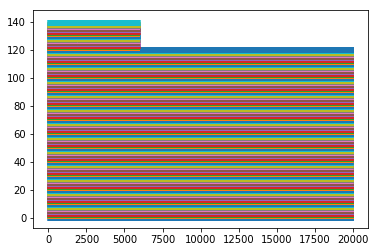

NameError: name 't' is not defined

In [12]:


# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)
#tstop = 100
spike_trains = []

ass = mdf1.analogsignals[0]   
tstop = mdf1.t_stop

vm_spiking = []
for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,tstop))
    spike_trains.append(pspikes)

# plot the spike times


for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')
plt.axis('tight')
plt.show()
    

for (i, spike_train) in enumerate(spike_trains):
    plt.plot(t, i * np.ones_like(t), 'k.', markersize=2)   
plt.axis('tight')
plt.show()
    
# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()



In [ ]:
plt.figure()
plt.plot(x, np.abs(y), '--k', label="ISI-profile")
print("ISI-distance: %.8f" % f.avrg())
f = spk.spike_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', label="SPIKE-profile")
print("SPIKE-distance: %.8f" % f.avrg())
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.figure()

f = spk.spike_sync_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()
plt.plot(x, y, '--ok', label="SPIKE-SYNC profile")
#print(f.x)
#print(f.y)
#print(f.mp)

print("Average:", f.avrg())


f = spk.spike_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()

plt.plot(x, y, '-b', label="SPIKE-profile")

plt.axis([0, 4000, -0.1, 1.1])
plt.legend(loc="center right")

plt.figure()

plt.subplot(211)

f = spk.spike_sync_profile(spike_trains)
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', alpha=0.7, label="SPIKE-Sync profile")

x1, y1 = f.get_plottable_data(averaging_window_size=50)
plt.plot(x1, y1, '-k', lw=2.5, label="averaged SPIKE-Sync profile")

plt.subplot(212)

f_psth = spk.psth(spike_trains, bin_size=50.0)
x, y = f_psth.get_plottable_data()
plt.plot(x, y, '-k', alpha=1.0, label="PSTH")


print("Average:", f.avrg())

plt.show()

In [ ]:

#print(spike_trains)
plt.figure()
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none')
plt.title("ISI-distance")
plt.show()

plt.figure()
plt.clf()
import seaborn as sns
sns.set()
sns.clustermap(isi_distance)#,vmin=-,vmax=1);
#plt.show()

In [ ]:


plt.figure()
spike_distance = spk.spike_distance_matrix(spike_trains, interval=(0, float(tstop)))


import pickle
with open('spike_distance_matrix.p','wb') as f:
   pickle.dump(spike_distance,f)

plt.imshow(spike_distance, interpolation='none')
plt.title("SPIKE-distance, T=0-1000")


#plt.imshow(isi_distance, interpolation='none')
#plt.title("ISI-distance")
plt.show()

plt.figure()
plt.clf()
import seaborn as sns
sns.set()
sns.clustermap(spike_distance);
plt.show()

In [ ]:

plt.figure()
spike_sync = spk.spike_sync_matrix(spike_trains, interval=(0, float(tstop)))
plt.imshow(spike_sync, interpolation='none')

import numpy
a = numpy.asarray(spike_sync)
numpy.savetxt("spike_sync_matrix.csv", a, delimiter=",")

'''
import pickle
with open('spike_sync_matrix.p','wb') as f:
   pickle.dump(spike_sync,f)
'''
plt.show()

plt.figure()
plt.clf()

sns.clustermap(spike_sync);

#plt.title("SPIKE-Sync, T=2000-4000")
plt.show()

In [ ]:
import pickle
with open('bool_matrix.p','rb') as f:
   m = pickle.load(f)
print(type(m))
print(m)
import networkx as nx
G = nx.DiGraph(m)
in_degree = G.in_degree()
top_in = sorted(([ (v,k) for k, v in in_degree.items() ]))
in_hub = top_in[-1][1]
out_degree = G.out_degree()
top_out = sorted(([ (v,k) for k, v in out_degree.items() ]))
out_hub = top_out[-1][1]

sns.clustermap(m);

plt.show()


plt.figure()
plt.clf()
plt.imshow(m, interpolation='none')
plt.title("connection matrix")
plt.show()


In [ ]:

mean_out = np.mean(list(out_degree.values()))
mean_in = np.mean(list(in_degree.values()))

mean_conns = int(np.floor(mean_in + mean_out)/2)

k = 2 # number of neighbouring nodes to wire.
p = 0.25 # probability of instead wiring to a random long range destination.
ne = np.shape(m)[0]# size of small world network
print(ne)
swe = nx.watts_strogatz_graph(ne,mean_conns,0.25)

#import networkx as nx
Gswe = nx.DiGraph(swe)
in_degree = Gswe.in_degree()
top_in = sorted(([ (v,k) for k, v in in_degree.items() ]))
in_hub = top_in[-1][1]
out_degree = Gswe.out_degree()
top_out = sorted(([ (v,k) for k, v in out_degree.items() ]))
out_hub = top_out[-1][1]

In [ ]:
#print(dir(swe))

In [ ]:
lswe = Gswe.adjacency_list()
excit_sm = np.zeros(shape=(ne,ne), dtype=bool)
#inhib_sm = np.zeros(shape=(ne,ne), dtype=bool)

for i,j in enumerate(lswe):
    for k in j:
        excit_sm[i,k] = int(1)


In [ ]:


plt.figure()
plt.clf()
plt.imshow(excit_sm, interpolation='none')
plt.title("Small World connection matrix")
plt.show()

import numpy
a = numpy.asarray(excit_sm)
numpy.savetxt("small_world.csv", a, delimiter=",")
#print(lswe)
